Nico Hillison

Spring 2021

CS 251: Data Analysis and Visualization

Project 2: Matrix Transformations

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import data
import transformation

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20, 'figure.figsize': (4, 4)})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 2: Matrix Transformations

The goal of this project is to give you practice using matrix multiplication to efficiently transform data (translation, scaling, and rotation). To that end, you'll develop the Transformation class as a child class of Analysis, from Project 1. 

We expect you to create the transformation matrices and and apply them from data using matrix multiplication yourself — **you may not call high-level functions to do all the work for you**. Functions similar to the following are fine to use:

- creating an identity matrix with `np.eye()`
- creating matrices of zeros or ones with `np.zeros()` or `np.ones()`
- concatenating matrices with `np.hstack()` or `np.vstack()`

Here is an **overview** of Transformation class's methods in transformation.py (use tasks below to guide you through the implementation):
1. `__init__()`: The constructor.
1. `get_data_homogeneous()`: Adds a column of normal homogeneous coordinates to the data matrix.
2. `project()`: Projects the M-dimensional Data object in self.data onto a subset of its axes.
3. Construct homogeneous transformation matrices (in any order):
> * `translation_matrix()`: Constructs an M+1-by-M+1 translation matrix for shifting the M-dimensional Data object in self.data
> * `scale_matrix()`: Constructs an M+1-by-M+1 scale matrix for resizing the M-dimensional Data object in self.data
> * `rotation_matrix_3d()`: Constructs a 4x4 rotation matrix for rotating the 3-dimensional Data object in self.data
4. Apply transformation matrices to the Data object in self.data (with homogeneous coordinates):
> * `translate()`: Uses a translation matrix to transform self.data
> * `scale()`: Uses a scale matrix to transform self.data
> * `rotate_3d()`: Uses a 3D rotation matrix to transform self.data (which must, in this case, contain exactly 3 features, plus the normal homogeneous coordinate)
> * `transform()`: Uses a homogeneous transformation matrix (passed as a parameter) to transform self.data.
5. Normalization:
> * `normalize_together()`: Uses homogeneous transformation matrices to normalize all the features of self.data together, using the global min and max.
> * `normalize_separately()`: Uses homogeneous transformation matrices to normalize each feaure separately, using its own local min and max.
6. Visualization:
> * `scatter_color()`: Similar to Analysis.scatter(), but using a third feature to control the color of the plotted data points.
> * `heatmap()`: This function is provided for you, already completed. Take a look to see what it's doing.

Use this notebook to demo your completed Transformation class (transformation.py).

## Task 0) Preprocess Iris data

- Copy over `data.py`, `analysis.py`, and `iris.csv` from Project 1.
- In whatever way you wish, replace the `species` strings with ints — i.e. setosa -> 0, versicolor -> 1, virginica -> 2. *Remember to change the type to numeric!*

## Task 1) Implement transformation matrices

Implement the following methods in `transformation.py`, running the following test code to guide you as you work. 
- Constructor
- `project(headers)`: "project" the data on the list of data variables specified by `headers` — i.e. select a subset of the variables from the original dataset.
- `get_data_homogeneous`: Helper method to get a version of the projected data array with an added homogeneous coordinate.
- `translation_matrix(magnitudes)`: Make an M-dimensional homogeneous transformation matrix for translation
- `scale_matrix(magnitudes)`: Make an M-dimensional homogeneous scaling matrix for scaling.

### Test (i): Translation

Write test code in the cell below that does the following. Note the below expected output.

* Create Data and Transformation objects for the Iris dataset. 
* Project the Transformation object's data onto the first 3 axes (`sepal_length`, `sepal_width`, and `petal_length`).
* Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +1.5 along `petal_length`, then print the translation matrix. 

In [4]:
# Your test code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
form = transformation.Transformation(iris_data)
#print(form)
form.project(['sepal_length', 'sepal_width', 'petal_length'])
translation = form.translation_matrix([-0.5, 0, 1.5])
print(translation)
#print(form.orig_dataset)

[[ 1.   0.   0.  -0.5]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.   1.5]
 [ 0.   0.   0.   1. ]]


**Your output should look like:**

    Translation matrix:
    [[ 1.   0.   0.  -0.5]
     [ 0.   1.   0.   0. ]
     [ 0.   0.   1.   1.5]
     [ 0.   0.   0.   1. ]]

### Test (ii): Scaling

* Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`, then print the scaling matrix.

In [5]:
# Your test code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
form = transformation.Transformation(iris_data)
#print(form)
form.project(['sepal_length', 'sepal_width', 'petal_length'])
scaling = form.scale_matrix([1, 2, 1/3])
print(scaling)
#print(form.orig_dataset)

[[1.      0.      0.      0.     ]
 [0.      2.      0.      0.     ]
 [0.      0.      0.33333 0.     ]
 [0.      0.      0.      1.     ]]


**Your output should look like:**

    Scale matrix:
    [[1.      0.      0.      0.     ]
     [0.      2.      0.      0.     ]
     [0.      0.      0.33333 0.     ]
     [0.      0.      0.      1.     ]]

## Task 2) Transformation Detective

The objective of this task is to determine the set of matrix transformations to apply to the specified data and what variables to project onto in order to reproduce the below plots.

### 2a) Hello, Iris

- Create Data and Transformation objects for the Iris dataset.
- Project the dataset onto all the headers.
- Use the Transfromation object to generate a pair plot of the entire Iris dataset. (*Your results should look just like the example, below.*)

In [6]:
print(iris_data.header2col)

{'sepal_length': 0, 'sepal_width': 1, 'petal_length': 2, 'petal_width': 3, 'species': 4}


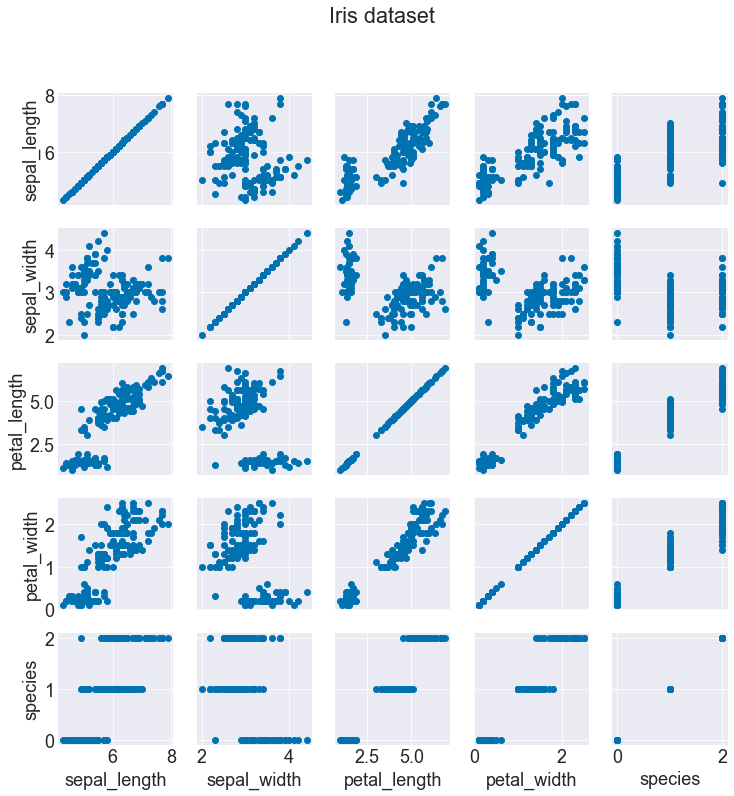

In [7]:
# Your code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
form = transformation.Transformation(iris_data)
#print(form)
headers = iris_data.get_headers()
form.project(headers)
# translate = form.translation_matrix([1, 1, 1])
#print(translate.shape)
# data_homog = form.get_data_homogeneous()
#print(data_homog.shape)
# n_data = (translate.T@data_homog).T
# iris_an = Analysis(iris_data)
form.pair_plot(headers, title='Iris dataset')
form.show()
#print()

#### Your results should look like the image below.

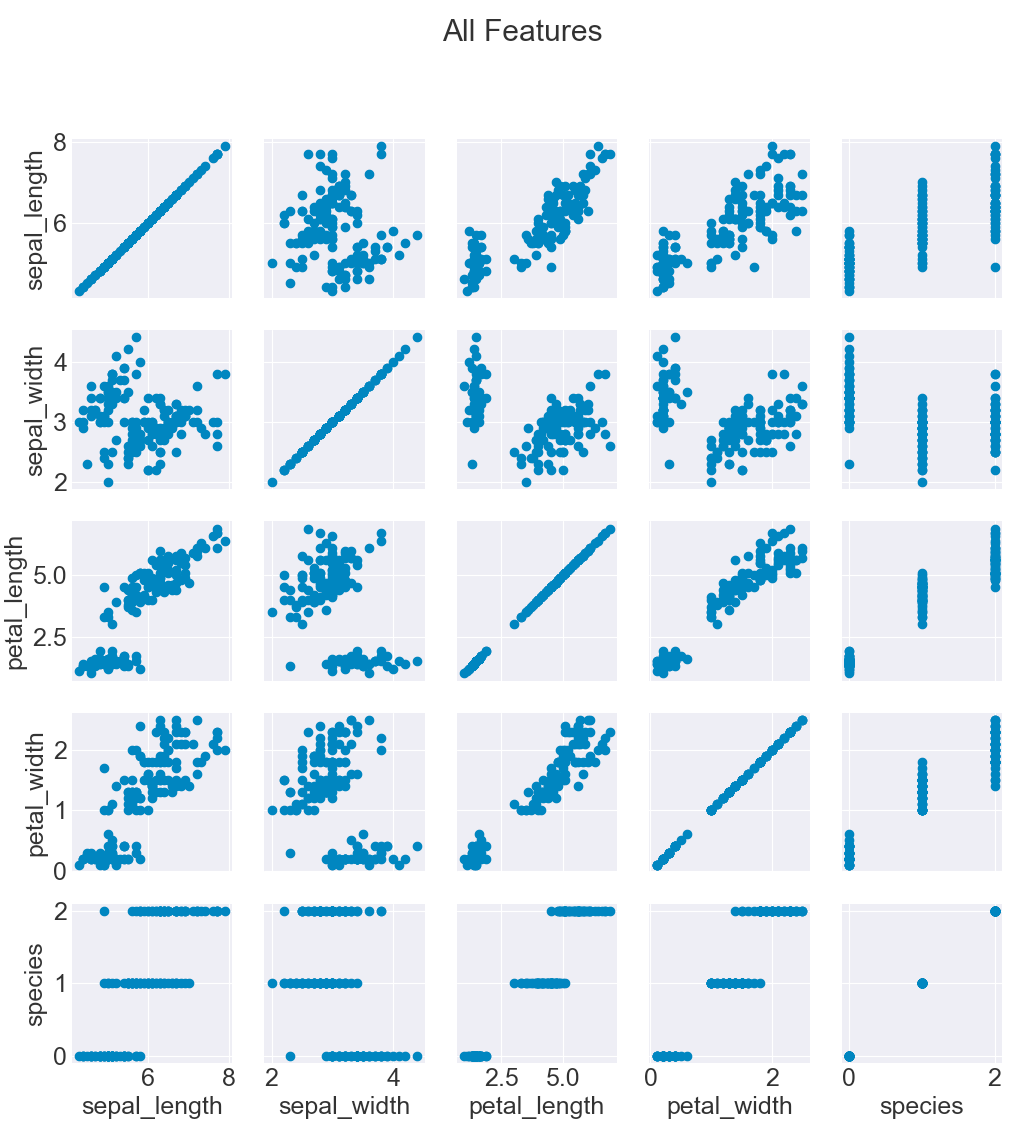

**Question 1:** How many dimensions (features) does the Iris dataset contain?

Answer 1: 5

### 2b) Solve transformation mystery 1

- Make a Transformation object.
- Determine the set of variables to project onto to recreate the image below.
- Create a pair plot identical to the one below based on the projected data.

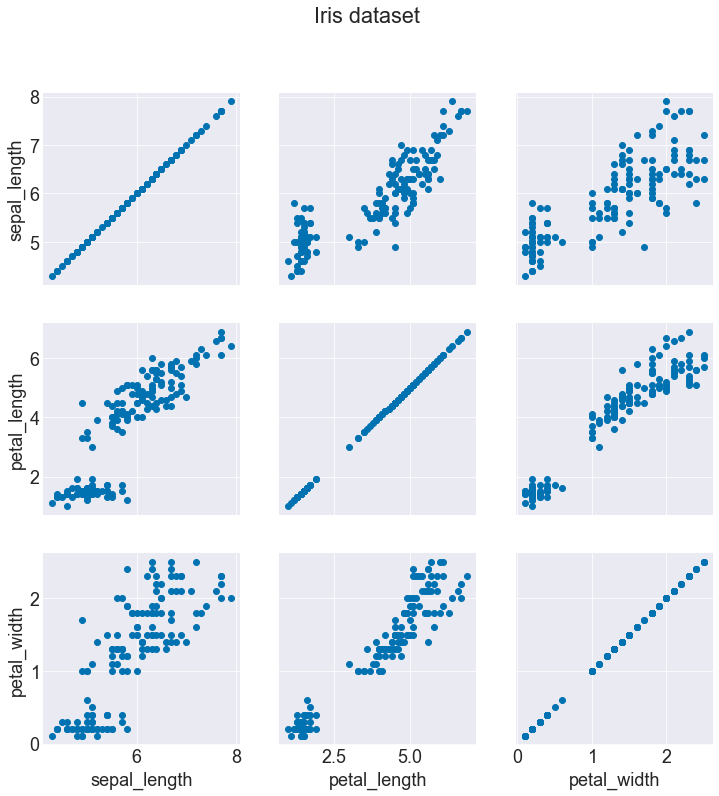

In [8]:
# Your code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
form = transformation.Transformation(iris_data)
#print(form)
headers = ['sepal_length', 'petal_length', 'petal_width']
form.project(headers)
# translate = form.translation_matrix([1, 1, 1])
#print(translate.shape)
# data_homog = form.get_data_homogeneous()
#print(data_homog.shape)
# n_data = (translate.T@data_homog).T
# iris_an = Analysis(iris_data)
form.pair_plot(headers, title='Iris dataset')
form.show()
#print()

#### Your results should look like the image below.

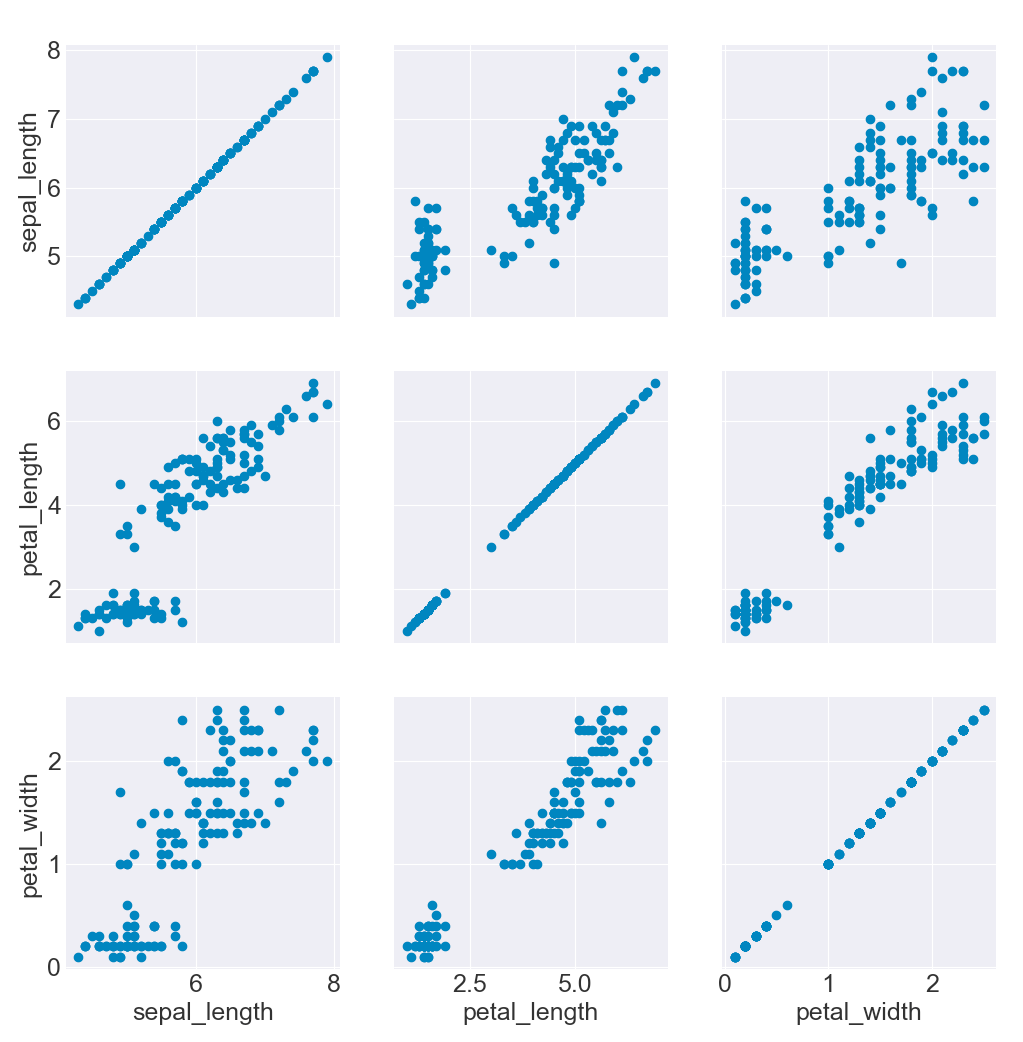

**Question 2:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

Answer 2: I chose the specific headers that were needed to re-create the figure.

### 2c) Implement methods that apply a single transformation

It can be convenient to have dedicated methods to apply a single transformation to projected data (without having to pass around matrices). Implement the following methods for this purpose:
- `translate`: Translates the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.
- `scale`: Scales the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.

#### Test `translate`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Translate x, y, and z by +1 unit each.
- Print out the 1st 5 samples of the result.

In [9]:
# Your test code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
form = transformation.Transformation(iris_data)
#print(form)
form.project(['sepal_length', 'sepal_width', 'petal_length'])
translation = form.translate([1, 1, 1])
print(translation)
#print(form.orig_dataset)

the first 5 rows of data are: 
[[6.1 4.5 2.4]
 [5.9 4.  2.4]
 [5.7 4.2 2.3]
 [5.6 4.1 2.5]
 [6.  4.6 2.4]]


**Your translate output should look like:**

    [[6.1 4.5 2.4]
     [5.9 4.  2.4]
     [5.7 4.2 2.3]
     [5.6 4.1 2.5]
     [6.  4.6 2.4]]

#### Test `scale`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Scale x, y, and z to 50% each.
- Print out the 1st 5 samples of the result.

In [10]:
# Your test code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
form = transformation.Transformation(iris_data)
#print(form)
form.project(['sepal_length', 'sepal_width', 'petal_length'])
scaling = form.scale([0.5,0.5,0.5])
print(scaling)
#print(form.orig_dataset)

the first 5 rows of data are: 
[[2.55 1.75 0.7 ]
 [2.45 1.5  0.7 ]
 [2.35 1.6  0.65]
 [2.3  1.55 0.75]
 [2.5  1.8  0.7 ]]


**Your scale output should look like:**

    [[2.55 1.75 0.7 ]
     [2.45 1.5  0.7 ]
     [2.35 1.6  0.65]
     [2.3  1.55 0.75]
     [2.5  1.8  0.7 ]]

### 2d) Solve transformation mystery 2

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data.

**NOTE:** Remember that `Transformation` inherits from `Analysis` so you have access to all those methods.

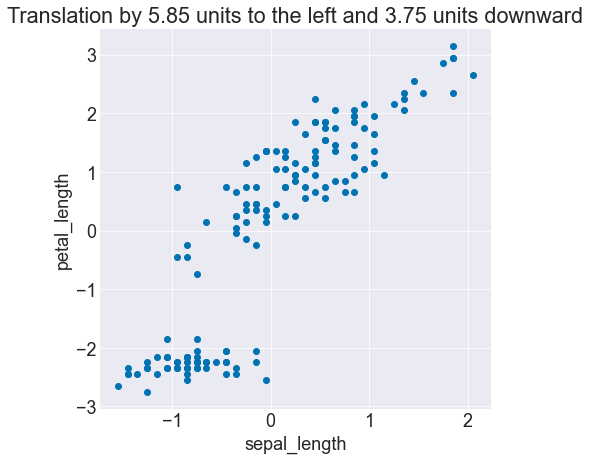

In [11]:
# Your code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
form = transformation.Transformation(iris_data)
form.project(['sepal_length', 'petal_length'])
translating = form.translate([-5.85, -3.75])
#translating = form.translate([1, 1])
form.scatter('sepal_length', 'petal_length', title='Translation by 5.85 units to the left and 3.75 units downward')
form.show()
#print()

#### Your results should look like the image below.

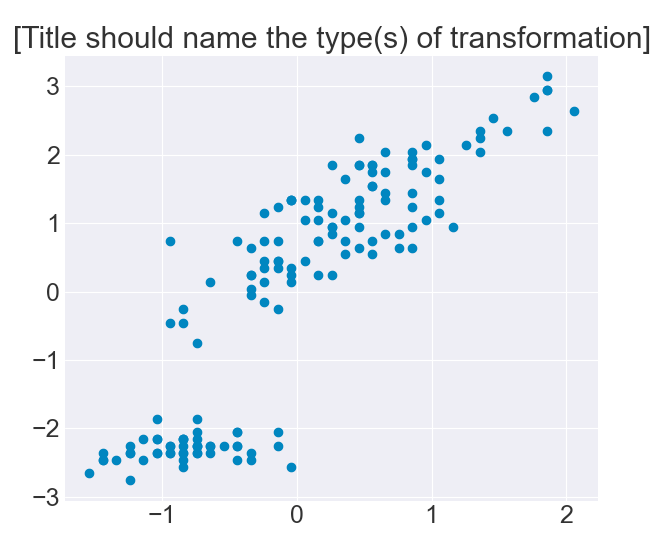

**Question 3:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

Answer 3: Because it wasn't about making the scatter bigger or smaller but moving the points in the x and y axis, in that case I needed to use translation.

### 2e) Solve transformation mystery 3

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data. 

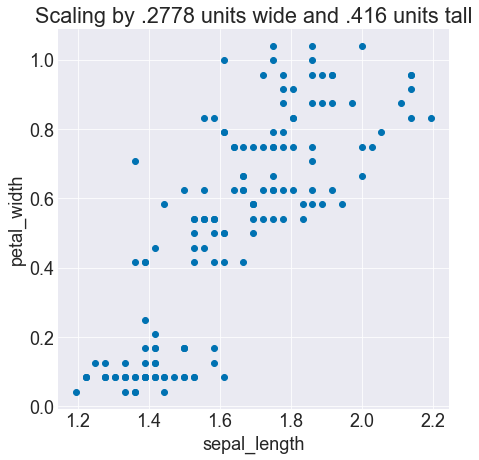

In [12]:
# Your code here
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
form = transformation.Transformation(iris_data)
form.project(['sepal_length', 'petal_width'])
#translating = form.translate([1, .09])
scaling = form.scale([.2778, .416])
form.scatter('sepal_length', 'petal_width', title='Scaling by .2778 units wide and .416 units tall')
form.show()

#### Your results should look like the plot below.

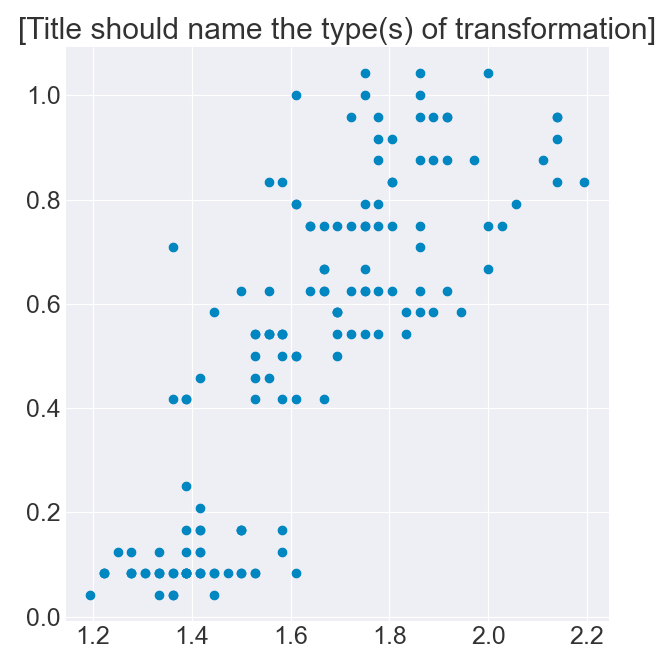

**Question 4:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

Answer 4: noticed that it had to be shrunk between 1.1-2.2 on the x-axis and 0-1.1 on the y-axis

## Task 3) Normalization

In this task, you will take advantage of your data transformation pipeline to normalize data in two ways:

1. All the variables together (entire matrix).
2. All the variables separately/independently.

### 3a) Applying compound transformations

Performing data normalization requires a sequence of matrix transformations. In cases like these, it can be convienent to create one compound transformation matrix `C` then multiply it once with the data matrix (instead of doing separate matrix multiplications for each transformation).

Before you start working on the normalization methods, implement the helper method `transform(C)` to transform the PROJECTED dataset by applying the homogeneous transformation matrix `C`.

#### Test `transform`: Perform the compound translation-scaling transformation to the projected data

* Create a Transformation object for the Iris dataset then project onto the first 3 variables: `sepal_length`, `sepal_width`, and `petal_length`.
* Create **and print** a compound transformation matrix `C` in the cell below from translation and scaling matrices that perform the following operations. Remember that order matters when building your compound transformation matrix and the data matrix will ultimately go on the right-hand side.
    - Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +1.5 along `petal_length`. 
    - Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`.
- Use the `transform` method to apply it to the projected data. **Print the 1st 5 samples.**

In [13]:
# Your test code here
iris_filename = 'data/iris.csv'
iris_t = data.Data(iris_filename)
form = transformation.Transformation(iris_t)
#print(form)
form.project(['sepal_length', 'sepal_width', 'petal_length'])
T = form.translation_matrix([-.5,0,1.5])
S = form.scale_matrix([1, 2, 1/3])
C = S@T
print('Compound transformation matrix: \n', C)

print(form.transform(C))


#print(form.orig_dataset)

Compound transformation matrix: 
 [[ 1.       0.       0.      -0.5    ]
 [ 0.       2.       0.       0.     ]
 [ 0.       0.       0.33333  0.5    ]
 [ 0.       0.       0.       1.     ]]
[[4.6     7.      0.96667]
 [4.4     6.      0.96667]
 [4.2     6.4     0.93333]
 [4.1     6.2     1.     ]
 [4.5     7.2     0.96667]
 [4.9     7.8     1.06667]
 [4.1     6.8     0.96667]
 [4.5     6.8     1.     ]
 [3.9     5.8     0.96667]
 [4.4     6.2     1.     ]
 [4.9     7.4     1.     ]
 [4.3     6.8     1.03333]
 [4.3     6.      0.96667]
 [3.8     6.      0.86667]
 [5.3     8.      0.9    ]
 [5.2     8.8     1.     ]
 [4.9     7.8     0.93333]
 [4.6     7.      0.96667]
 [5.2     7.6     1.06667]
 [4.6     7.6     1.     ]
 [4.9     6.8     1.06667]
 [4.6     7.4     1.     ]
 [4.1     7.2     0.83333]
 [4.6     6.6     1.06667]
 [4.3     6.8     1.13333]
 [4.5     6.      1.03333]
 [4.5     6.8     1.03333]
 [4.7     7.      1.     ]
 [4.7     6.8     0.96667]
 [4.2     6.4     1.03333]

**Your output should look like:**


    Compound transformation matrix:
    [[ 1.       0.       0.      -0.5    ]
     [ 0.       2.       0.       0.     ]
     [ 0.       0.       0.33333  0.5    ]
     [ 0.       0.       0.       1.     ]]

    Transformed data:
    [[4.6     7.      0.96667]
     [4.4     6.      0.96667]
     [4.2     6.4     0.93333]
     [4.1     6.2     1.     ]
     [4.5     7.2     0.96667]]

### 3b) Normalize together

Implement `normalize_together` then test it below by following below steps:

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __together__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

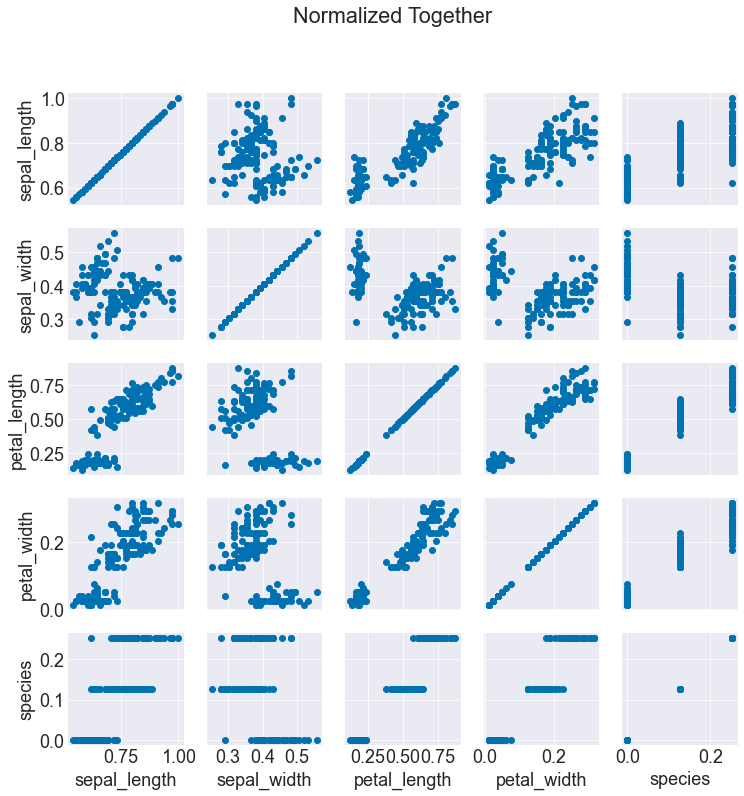

In [14]:
# Your test code here
iris_filename = 'data/iris.csv'
iris_t = data.Data(iris_filename)
form = transformation.Transformation(iris_t)
headers = iris_data.get_headers()
form.project(headers)
normalized = form.normalize_together()


form.pair_plot(headers, title='Normalized Together')
form.show()

#### Your results should look like the image below.

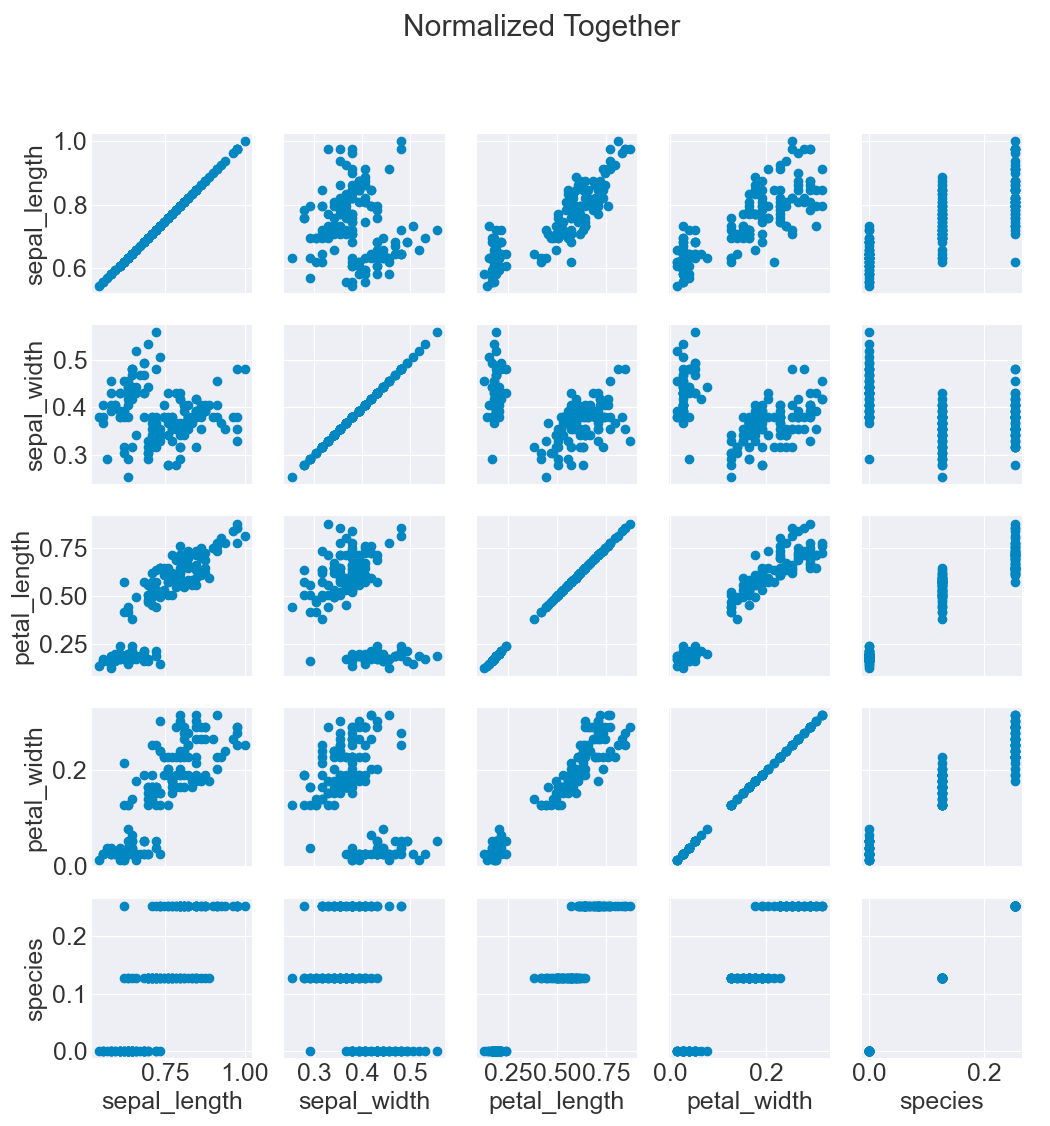

### 3c) Normalize Separately

Implement `normalize_separately` then test it below by following below steps:

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __separately__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

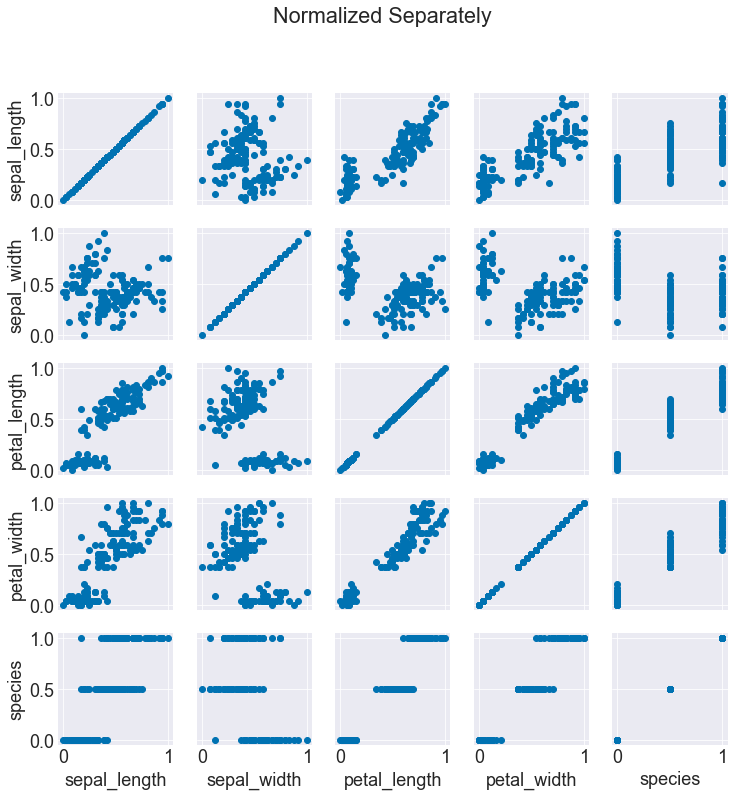

In [15]:
# Your test code here
iris_filename = 'data/iris.csv'
iris_t = data.Data(iris_filename)
form = transformation.Transformation(iris_t)
headers = iris_data.get_headers()
form.project(headers)
normalized = form.normalize_separately()


form.pair_plot(headers, title='Normalized Separately')
form.show()

#### Your results should look like the image below.

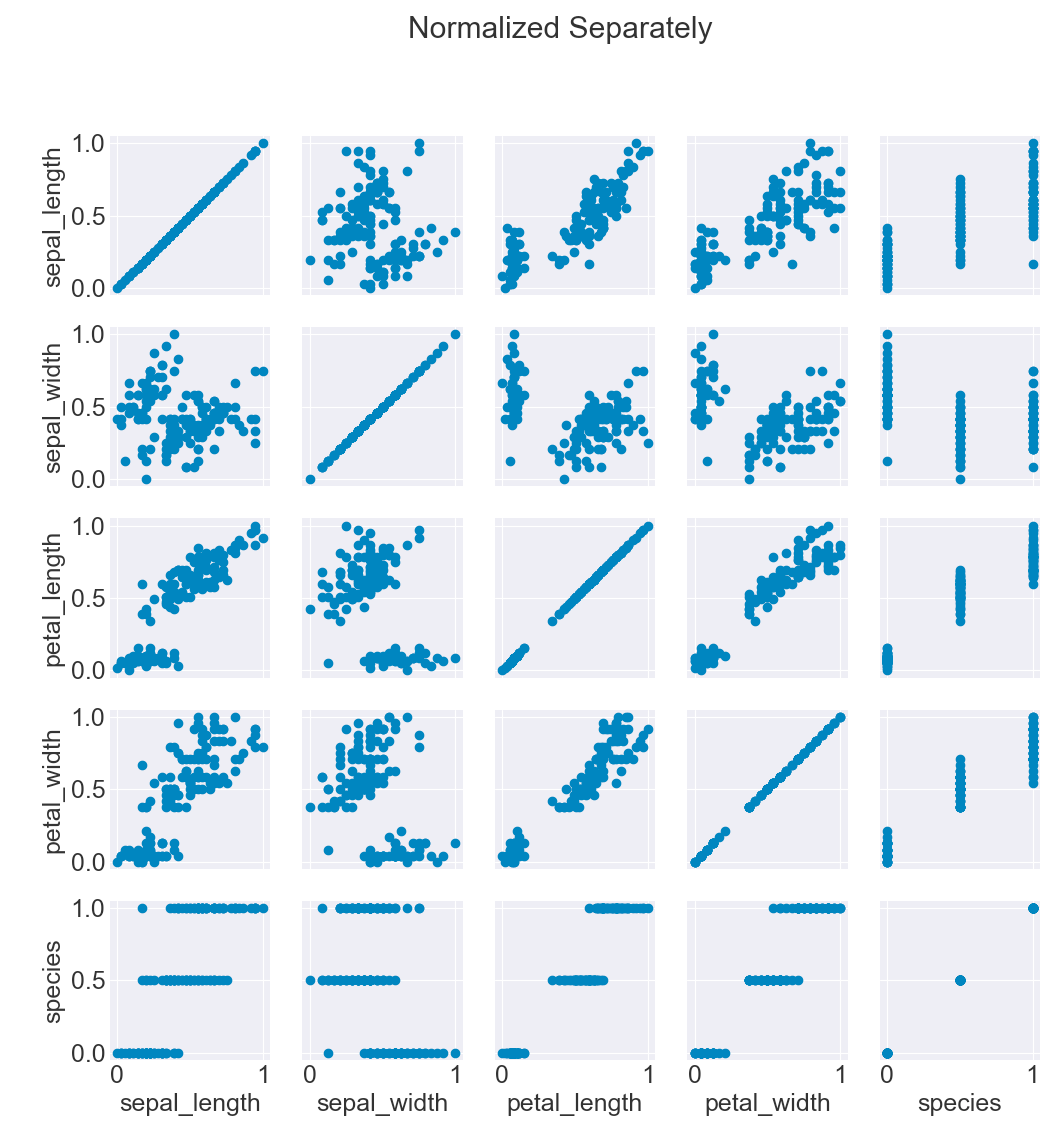

**Question 5:** What type(s) of transformation does normalization require, and in words, what is the meaning of the transformation matrix parameter values used?

Answer 5: it uses translation as well as scaling. translation shifts the data, and scaling divides it by range

## Task 4) Mystery Letter Dataset

In this task your goal is to find the 3 capital letters hidden in a dataset with 3 variables (3D data). You will begin by implementating methods to create rotation matrices and apply rotation. This operation will play an important role in discovering and transforming the data to uncover these letters.

### Task 4a) Rotation matrices

Implement the following methods then fill in the cells below to test your code.

- `rotation_matrix_3d(header, degrees)`: Make an 3-D homogeneous rotation matrix for rotating the projected data about the ONE axis/variable `header`.
- `rotate_3d`: Rotates the projected data about the variable `header` by the angle (in degrees) `degrees`

#### Test (i): `rotation_matrix_3d`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Create a rotatation matrix that would rotate the Transformation object's projected data by 45 degrees about `petal_length`, and print the rotation matrix.

In [16]:
# Your test code here
iris_filename = 'data/iris.csv'
iris_t = data.Data(iris_filename)
form = transformation.Transformation(iris_t)
#print(form)
form.project(['sepal_length', 'sepal_width', 'petal_length'])

rotating = form.rotation_matrix_3d('petal_length', 45)

print(rotating)

[[ 0.70711 -0.70711  0.       0.     ]
 [ 0.70711  0.70711  0.       0.     ]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]]


**Your output should look like:**

    Rotation matrix:
    [[ 0.70711 -0.70711  0.       0.     ]
     [ 0.70711  0.70711  0.       0.     ]
     [ 0.       0.       1.       0.     ]
     [ 0.       0.       0.       1.     ]]

#### Test (ii): `rotate_3d`

- Using the same Transformation object created in the previous test, rotate about `sepal_length` 10 deg.
- Print out the 1st 5 samples of the result.

In [17]:
# Your test code here
iris_filename = 'data/iris.csv'
iris_t = data.Data(iris_filename)
form = transformation.Transformation(iris_t)
#print(form)
form.project(['sepal_length', 'sepal_width', 'petal_length'])
rotate = form.rotate_3d('sepal_length', 10)
print(rotate)

projected_data shape:  (150, 4)
rotation matrix: (4, 4)
the first 5 rows of data are: 
[[5.1     3.20372 1.9865 ]
 [4.9     2.71132 1.89968]
 [4.7     2.92564 1.83592]
 [4.6     2.79243 2.01552]
 [5.      3.3022  2.00386]]


**Your rotation output should look like:**

    [[5.1     3.20372 1.9865 ]
     [4.9     2.71132 1.89968]
     [4.7     2.92564 1.83592]
     [4.6     2.79243 2.01552]
     [5.      3.3022  2.00386]]

### Task 4b)  Mystery Letter Dataset

Your goal is to find the 3 capital letters hidden in `letter_data.csv` with 3 variables (3D data) and create single scatter plots showing each individual letter plotted right-side up. 
- Create Data and Transformation objects for the Letters dataset (`letter_data.csv`).
- Normalize the data seperately then apply transformations to find the hidden letters (scaling, translating and/or rotation).

**Hints:**
- Remember: Applying transformations changes the data stored in the `Transformation` object (i.e. the effects on the data compound). After searching for and identifying one letter, it might be helpful to start with the original data again. This can be achieved by re-projecting and normalizing.
- Visualize the data using `pair_plot` and/or `scatter` after applying a transformation.
- Downloading and running `scatter3d.py` from Terminal will produce an interactive 3D scatterplot. Feel free to use this tool to explore the data and inform your decisions about which transformations to use.

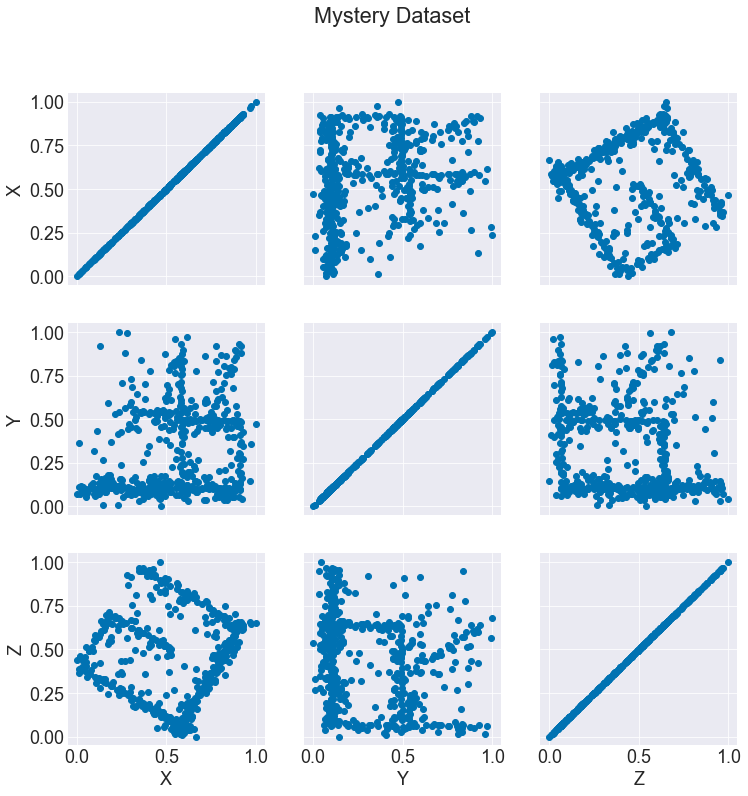

projected_data shape:  (517, 4)
rotation matrix: (4, 4)


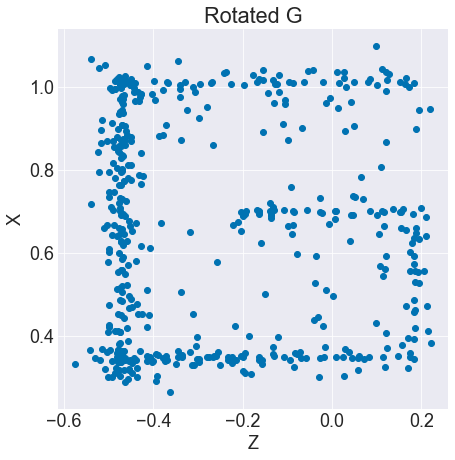

projected_data shape:  (517, 4)
rotation matrix: (4, 4)


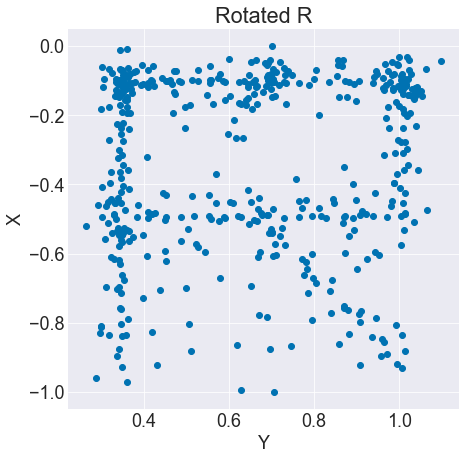

projected_data shape:  (517, 4)
rotation matrix: (4, 4)


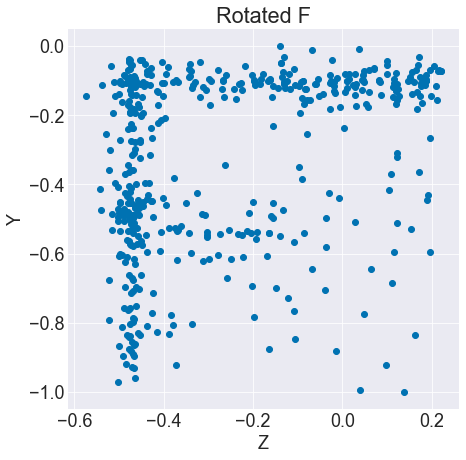

In [18]:
iris_filename = 'data/letter_data.csv'
letter_d = data.Data(iris_filename)
form = transformation.Transformation(letter_d)
headers = letter_d.get_headers()
form.project(headers)
normalized = form.normalize_separately()#normalize separately
form.pair_plot(headers, title='Mystery Dataset')
form.show()

#apply transformations G
form.rotate_3d('Y', 60)
form.scatter('Z', 'X', 'Rotated G')
form.show()

#apply transformations R
form.rotate_3d('Z', 90)
form.scatter('Y', 'X', 'Rotated R')
form.show()

#apply transformations F
form.rotate_3d('Z', 90)
form.scatter('Z', 'Y', 'Rotated F')
form.show()

**Question 6:** Which letters did you find?  How could you tell what type(s) of transformations needed to be performed to find the letters?

Answer 6: I found the letters G, R, F. I found them from randomly choosing angles to rotate the image from. I didn't it was more of a guessing game but then I ran scatter3d.py for the last one and figured what it needs to be rotated by.

## Task 5) Visualizing multi-dimensional data (>3D)

The Iris dataset has too many dimensions to visualize in 2D space with a standard scatterplot! Let's see what we can do about that.

### 5a) Color scales

In this subtask, you will use color to visualize a third dimension of the Iris dataset. Your color scale should be colorblind friendly.

- Implement the `scatter_color()` method to your `Transformation` class that uses color to represent a third axis on a 2D scatterplot.
    - Use a ColorBrewer color palette to implement the color scale (e.g. from the `palettable` library).
- Use your `scatter_color()` method to recreate the images below.
    * One with headers [`sepal_length`, `petal_length`, `sepal_width`].
    * Another with headers [`sepal_length`, `petal_length`, `species`].

**Reminder:** Re-project your data onto the appropriate variables before creating each plot.

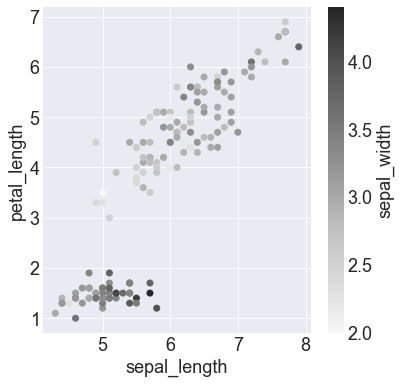

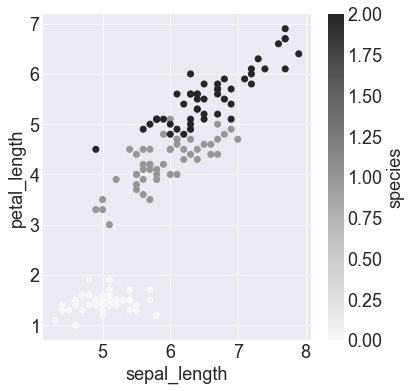

In [21]:
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
form = transformation.Transformation(iris_data)
headers = ['sepal_length', 'petal_length', 'sepal_width', 'species']
form.project(headers)
#normalized = form.normalize_separately()#normalize separately
form.scatter_color('sepal_length','petal_length', 'sepal_width')
form.scatter_color('sepal_length','petal_length', 'species')
form.show()

#### Your results should look like the following

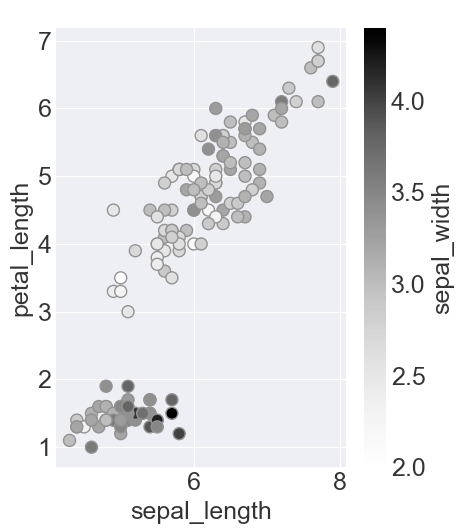

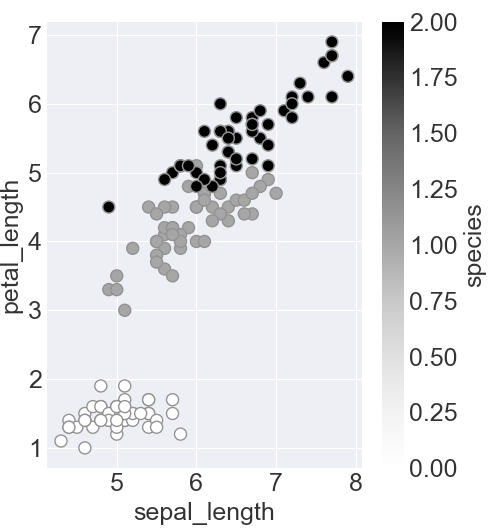

**Question 7:** In a scatterplot, is color a more useful representation of __continuous__ features (like sepal width) or __discrete__ features (like species)? Why do you think that is?

Answer 7: it is more for discrete features so it it easier to differentiate groups

### 5b) Heatmap

Use the a `heatmap()` method (written for you) to recreate the image below.

/Users/nicolashillison/Desktop/CS251/project 2/transformation.py:457: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_lbls)


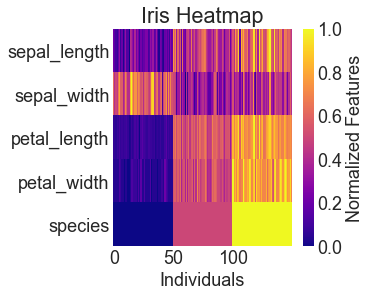

In [18]:
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
form = transformation.Transformation(iris_data)
headers = iris_data.get_headers()
# ['individuals','sepal_length', 'petal_length', 'sepal_width', 'species']
form.project(headers)
normalized = form.normalize_separately()#normalize separately
form.heatmap(headers, title = 'Iris Heatmap', cmap = 'plasma')
form.show()


#### Your results should look like the image below.

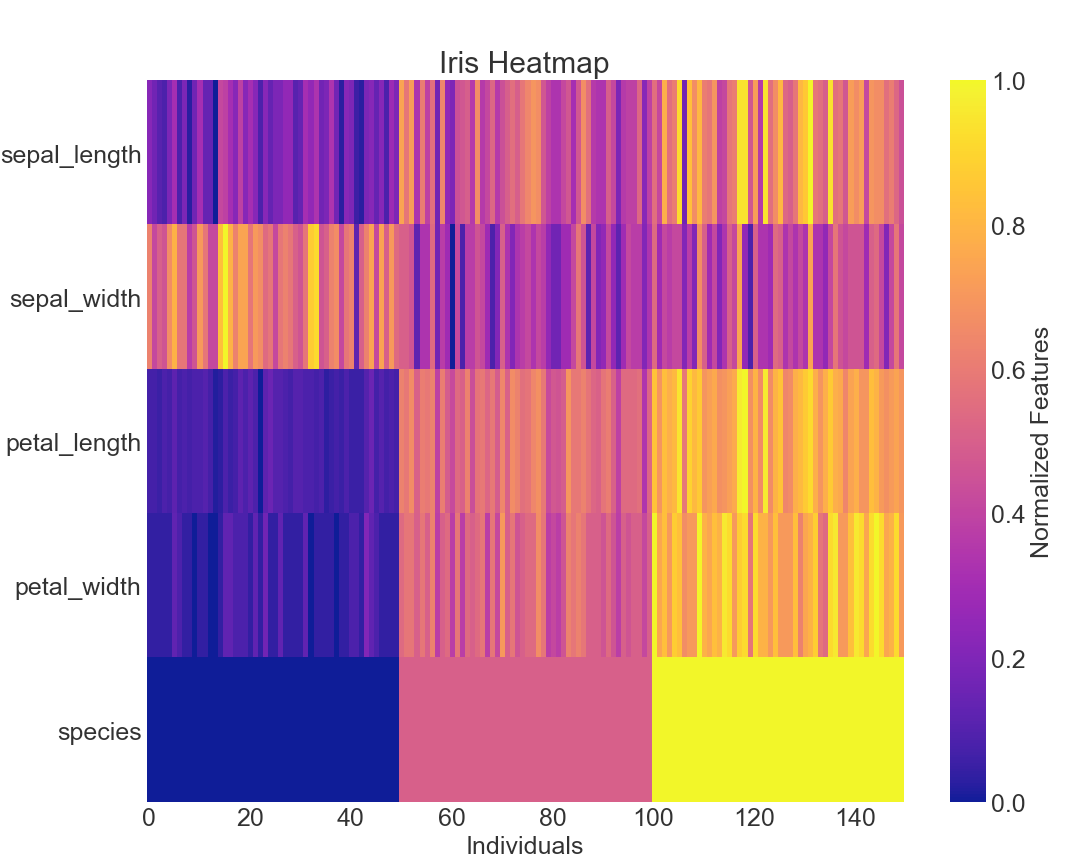

**Question 8:** Name at least one patterns in this heatmap that was difficult to see in the scatterplots?

**Question 9:** How does the order of the data in iris.csv support the readability of this heatmap? Explain your answer.

Answer 8: The heatmap gives you all the headers and compares them with the amount of individuals and as well normalized features while the scatter plot compares 3 different headers against each other.

Answer 9: The order that the columns are organized by. example: The species are all together and in order.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Explore additional visualizations

- Implement a scatter plot version that uses the marker size aesthetic to visualize another dimension of data (up to 4D).
- Implement a scatter plot version that uses both color and marker size aesthetics (up to 5D).

### 2. Perform different matrix transformations on data

- Normalize by Z-score rather than min/max.
- "Whiten" a dataset.
- Implement normalize together and separately using numpy vectorization/broadcasting. Compare the approaches in efficiency (time and compare the two implementations).

### 3. Implement and use 2D rotation

### 4. Apply matrix transformations and visualization a dataset of your choice